In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [26]:
df = pd.read_csv('breast_cancer.csv')
df

,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Passes Ro3_N,Passes Ro3_Y,Molecular Species_0,Molecular Species_ACID,Molecular Species_BASE,Molecular Species_NEUTRAL,Molecular Species_ZWITTERION,breast cancer_yes
0,4,302.41,90,223.0,3.97,54.37,3,1,0,0,...,0,302.1882,1,0,0,0,0,1,0,0
1,0,257.26,117,566.0,0.81,83.96,4,2,0,5,...,0,257.1176,1,0,0,0,0,1,0,0
2,4,204.30,158,958.0,2.15,15.60,3,0,0,1,...,0,204.0721,0,1,0,0,1,0,0,0
3,4,363.39,37,184.0,0.15,132.96,6,4,0,4,...,0,363.0889,1,0,0,1,0,0,0,0
4,4,258.23,206,750.0,0.09,83.55,4,1,0,1,...,0,258.0641,1,0,0,0,0,1,0,0
5,4,268.27,80,147.0,-2.71,98.82,6,2,0,3,...,0,268.1172,1,0,0,0,0,1,0,0
6,4,415.43,318,421.0,3.75,101.38,7,2,0,5,...,0,415.1557,1,0,0,0,0,1,0,1
7,4,303.68,26,109.0,-0.35,119.31,8,3,0,2,...,0,303.0534,1,0,0,0,0,1,0,1
8,4,302.35,8,55.0,2.37,64.35,3,2,0,7,...,0,302.1431,1,0,0,0,0,1,0,1
9,4,300.40,77,79.0,3.59,43.37,3,0,0,0,...,0,300.1725,1,0,1,0,0,0,0,1


In [27]:
# Isolate class label and features
X = df.drop('breast cancer_yes', axis = 1)
y = df['breast cancer_yes']

In [28]:
# implementing train-test-split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=66)

In [29]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

C:\Users\jquin\Anaconda3\envs\website\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
# # Run cross-validation
# rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

# make predictions for test data
y_pred = rfc.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print("=== Confusion Matrix ===")
# print(confusion_matrix(y_test, rfc_predict))
# print('\n')
# print("=== Classification Report ===")
# print(classification_report(y_test, rfc_predict))
# print('\n')
# print("=== All AUC Scores ===")
# print(rfc_cv_score)
# print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Accuracy: 76.47%


In [32]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [42]:
# rfc = RandomForestClassifier(n_estimators=1000, max_depth=140, max_features='auto')
# rfc.fit(X_train,y_train)
# rfc_predict = rfc.predict(X_test)

# make predictions for test data
y_pred = rfc.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


# rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
# print('\n')
# print("=== All AUC Scores ===")
# print(rfc_cv_score)
# print('\n')
# print("=== Mean AUC Score ===")
# print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Accuracy: 82.35%
=== Confusion Matrix ===
[[ 1  3]
 [ 0 13]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.81      1.00      0.90        13

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17



In [36]:
## XG-BOOST CLASSIFIER
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.47%


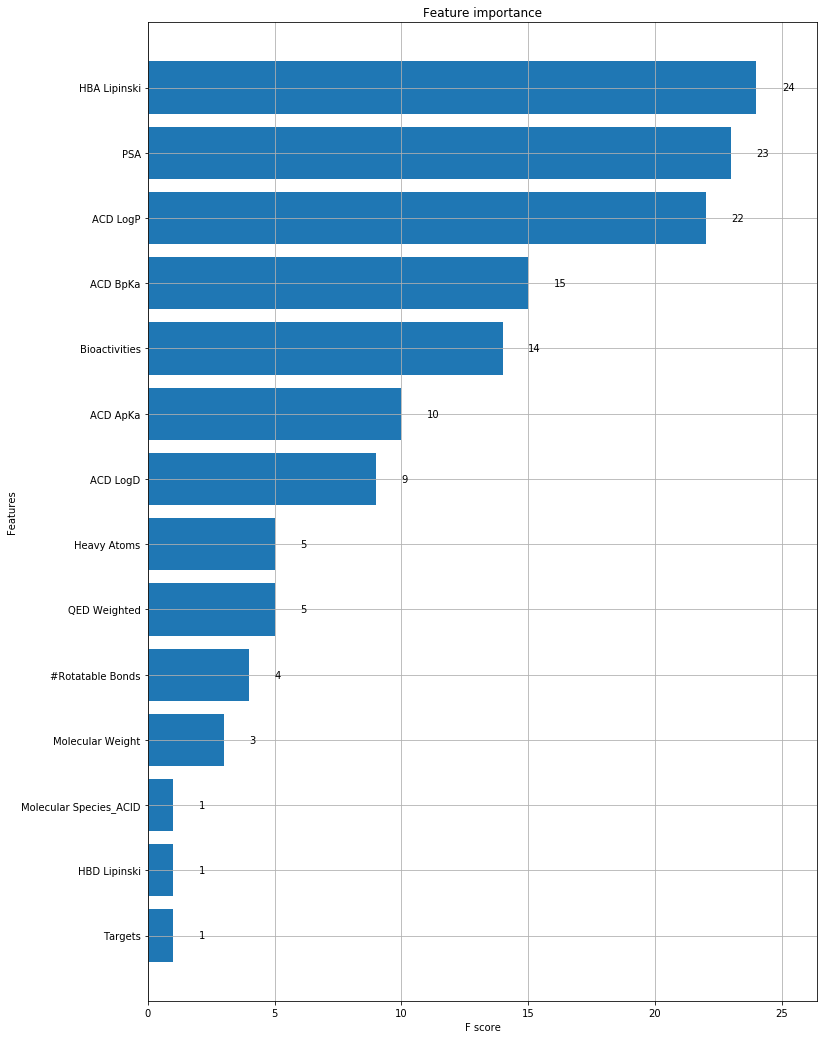

In [40]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
pyplot.show()

In [46]:
# Read in full dataset
df_full = pd.read_csv('203am.csv')
df_full

,Unnamed: 0,CID,hb_no_img,hb_yes_img,Unnamed: 0.1,bc_no_img,bc_yes_img,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,...,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Images,alzheimer,breast cancer,hep B,hb_yes_tab
0,0,10000219,0.8248,0.1752,0,0.0616,0.9384,11262,11262,11262,...,0,386.0987,ACID,C14H27O6PS2,CCCCC(=O)SC[C@H](COP(=O)(O)OC)SC(=O)CCCC,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.569
1,1,10001216,0.9472,0.0528,1,0.0539,0.9461,14105,14105,14105,...,0,403.1856,NEUTRAL,C19H25N5O5,CN1C(=O)C=C(N2CCN(CCCOc3cccc(c3)[N+](=O)[O-])C...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.586
2,2,10001279,0.9411,0.0589,2,0.0340,0.9660,13665,13665,13665,...,0,404.1882,NEUTRAL,C20H28N4O3S,CSc1ccccc1OCCCN2CCN(CC2)C3=CC(=O)N(C)C(=O)N3C,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.543
3,3,10001759,0.9928,0.0072,3,0.0370,0.9630,6219,6219,6219,...,0,412.1918,NEUTRAL,C24H29ClN2O2,Clc1ccc(cc1)C2(CCCC2)C(=O)OCCN3CCN(CC3)c4ccccc4,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.389
4,4,10001924,0.8633,0.1367,4,0.1034,0.8966,11410,11410,11410,...,0,379.1896,NEUTRAL,C22H25N3O3,Cc1cccc2COC(=O)N(C3CCN(CC(=O)Nc4ccccc4)CC3)c12,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907,13907,73303,0.5878,0.4122,13864,0.0000,1.0000,177395,177395,177395,...,1,420.1137,ZWITTERION,C15H24N4O6S2,C[C@@H](O)[C@@H]1[C@H]2[C@@H](C)C(=C(N2C1=O)C(...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.705
13908,13908,807,0.0876,0.9124,13865,0.0000,1.0000,385458,385458,385458,...,0,253.8089,NaN,I2,II,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.698
13909,13909,8768,0.1804,0.8196,13866,0.0000,1.0000,1029100,1029100,1029100,...,0,138.0317,NEUTRAL,C7H6O3,Oc1ccc(C=O)cc1O,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.863
13910,13910,9444,0.0381,0.9619,13867,0.0000,1.0000,1041013,1041013,1041013,...,0,244.0808,NEUTRAL,C8H12N4O5,NC1=NC(=O)N(C=N1)[C@@H]2O[C@H](CO)[C@@H](O)[C@...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.823


In [47]:
# Drop unneeded columns
df_full_cleaned = df_full.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'alzheimer', 'Molecular Formula', 'Smiles', 'Images', 'bc_no_img', 'bc_yes_img', 'ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Structure Type', 'hb_no_img', 'hb_yes_img', 'Unnamed: 0.1.1.1.1', 'breast cancer', 'hep B'], axis=1)

# make copy
df2 = df_full_cleaned

# Fill NaN w/ 0
df2 = df2.fillna(0)

# One hot encode all data attributes
df2 = pd.get_dummies(df2)

# FULL SET BUT WITH CID'S
df2_no_CID = df2.drop(['CID'], axis = 1)
df2.to_csv('df2.csv')


# THIS IS THE FULL SET WE NEED TO RUN PREDICTIONS ON
df2_no_CID = df2_no_CID.drop(['Molecular Species_ZWITTERION'], axis = 1)
df2_no_CID.to_csv('df2_no_CID.csv', index = 0)

df2_no_CID

,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,...,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),hb_yes_tab,Passes Ro3_N,Passes Ro3_Y,Molecular Species_0,Molecular Species_ACID,Molecular Species_BASE,Molecular Species_NEUTRAL
0,0,386.47,0,0.0,4.02,89.90,7,1,0,13,...,1,0,386.0987,0.569,1,0,0,1,0,0
1,0,403.44,0,0.0,0.58,102.85,9,0,0,7,...,0,0,403.1856,0.586,1,0,0,0,0,1
2,0,404.54,0,0.0,1.40,59.71,8,0,0,7,...,0,0,404.1882,0.543,1,0,0,0,0,1
3,0,412.96,0,0.0,4.52,32.78,4,0,0,6,...,0,0,412.1918,0.389,1,0,0,0,0,1
4,0,379.46,0,0.0,3.55,61.88,4,1,0,4,...,1,0,379.1896,0.351,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907,4,420.51,139,1967.0,-1.60,162.06,7,5,0,7,...,6,1,420.1137,0.705,1,0,0,0,0,0
13908,4,253.81,1,14.0,1.77,0.00,0,0,0,0,...,0,0,253.8089,0.698,0,1,1,0,0,0
13909,0,138.12,31,85.0,0.91,57.53,3,2,0,1,...,2,0,138.0317,0.863,0,1,0,0,0,1
13910,4,244.21,170,628.0,-3.17,143.72,9,4,0,2,...,5,0,244.0808,0.823,1,0,0,0,0,1


In [52]:
# RUN PREDICTIONS

# make predictions for test data
confidences_1 = rfc.predict(df2_no_CID)

list_test = []
confidences_2 = rfc.predict_proba(df2_no_CID)

for i in confidences_2:
    list_test.append(i[1])

test = pd.DataFrame()
test["bc_yes_tab"] = list_test
test
    

,bc_yes_tab
0,0.926
1,0.947
2,0.953
3,0.905
4,0.920
...,...
13907,0.861
13908,0.800
13909,0.905
13910,0.892


In [53]:
df_full["bc_yes_tab"] = list_test
df_full


,Unnamed: 0,CID,hb_no_img,hb_yes_img,Unnamed: 0.1,bc_no_img,bc_yes_img,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,...,Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Images,alzheimer,breast cancer,hep B,hb_yes_tab,bc_yes_tab
0,0,10000219,0.8248,0.1752,0,0.0616,0.9384,11262,11262,11262,...,386.0987,ACID,C14H27O6PS2,CCCCC(=O)SC[C@H](COP(=O)(O)OC)SC(=O)CCCC,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.926,0.926
1,1,10001216,0.9472,0.0528,1,0.0539,0.9461,14105,14105,14105,...,403.1856,NEUTRAL,C19H25N5O5,CN1C(=O)C=C(N2CCN(CCCOc3cccc(c3)[N+](=O)[O-])C...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.947,0.947
2,2,10001279,0.9411,0.0589,2,0.0340,0.9660,13665,13665,13665,...,404.1882,NEUTRAL,C20H28N4O3S,CSc1ccccc1OCCCN2CCN(CC2)C3=CC(=O)N(C)C(=O)N3C,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.953,0.953
3,3,10001759,0.9928,0.0072,3,0.0370,0.9630,6219,6219,6219,...,412.1918,NEUTRAL,C24H29ClN2O2,Clc1ccc(cc1)C2(CCCC2)C(=O)OCCN3CCN(CC3)c4ccccc4,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.905,0.905
4,4,10001924,0.8633,0.1367,4,0.1034,0.8966,11410,11410,11410,...,379.1896,NEUTRAL,C22H25N3O3,Cc1cccc2COC(=O)N(C3CCN(CC(=O)Nc4ccccc4)CC3)c12,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN,0.920,0.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907,13907,73303,0.5878,0.4122,13864,0.0000,1.0000,177395,177395,177395,...,420.1137,ZWITTERION,C15H24N4O6S2,C[C@@H](O)[C@@H]1[C@H]2[C@@H](C)C(=C(N2C1=O)C(...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.861,0.861
13908,13908,807,0.0876,0.9124,13865,0.0000,1.0000,385458,385458,385458,...,253.8089,NaN,I2,II,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.800,0.800
13909,13909,8768,0.1804,0.8196,13866,0.0000,1.0000,1029100,1029100,1029100,...,138.0317,NEUTRAL,C7H6O3,Oc1ccc(C=O)cc1O,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.905,0.905
13910,13910,9444,0.0381,0.9619,13867,0.0000,1.0000,1041013,1041013,1041013,...,244.0808,NEUTRAL,C8H12N4O5,NC1=NC(=O)N(C=N1)[C@@H]2O[C@H](CO)[C@@H](O)[C@...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,yes,NaN,0.892,0.892


In [59]:
df_full_final = df_full.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'alzheimer', 'bc_no_img', 'hb_no_img', 'breast cancer', 'hep B'], axis=1)
df_full_final.to_csv('final_dataset.csv', index = False)
df_full_final


,CID,hb_yes_img,bc_yes_img,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,...,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Images,hb_yes_tab,bc_yes_tab
0,10000219,0.1752,0.9384,CHEMBL1204513,NaN,NaN,Small molecule,0,386.47,0,...,6,1,0,386.0987,ACID,C14H27O6PS2,CCCCC(=O)SC[C@H](COP(=O)(O)OC)SC(=O)CCCC,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.926,0.926
1,10001216,0.0528,0.9461,CHEMBL1193207,NaN,NaN,Small molecule,0,403.44,0,...,10,0,0,403.1856,NEUTRAL,C19H25N5O5,CN1C(=O)C=C(N2CCN(CCCOc3cccc(c3)[N+](=O)[O-])C...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.947,0.947
2,10001279,0.0589,0.9660,CHEMBL1189691,NaN,NaN,Small molecule,0,404.54,0,...,7,0,0,404.1882,NEUTRAL,C20H28N4O3S,CSc1ccccc1OCCCN2CCN(CC2)C3=CC(=O)N(C)C(=O)N3C,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.953,0.953
3,10001759,0.0072,0.9630,CHEMBL1189655,NaN,NaN,Small molecule,0,412.96,0,...,4,0,0,412.1918,NEUTRAL,C24H29ClN2O2,Clc1ccc(cc1)C2(CCCC2)C(=O)OCCN3CCN(CC3)c4ccccc4,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.905,0.905
4,10001924,0.1367,0.8966,CHEMBL1189255,NaN,NaN,Small molecule,0,379.46,0,...,6,1,0,379.1896,NEUTRAL,C22H25N3O3,Cc1cccc2COC(=O)N(C3CCN(CC(=O)Nc4ccccc4)CC3)c12,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.920,0.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13907,73303,0.4122,1.0000,CHEMBL491571,DORIPENEM,DORIBAX|DORIPENEM|Finibax|S-4661,Small molecule,4,420.51,139,...,10,6,1,420.1137,ZWITTERION,C15H24N4O6S2,C[C@@H](O)[C@@H]1[C@H]2[C@@H](C)C(=C(N2C1=O)C(...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.861,0.861
13908,807,0.9124,1.0000,CHEMBL1201225,IODINE,IODINE,Small molecule,4,253.81,1,...,0,0,0,253.8089,NaN,I2,II,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.800,0.800
13909,8768,0.8196,1.0000,CHEMBL222021,PROTOCATECHUALDEHYDE,"3,4-Dihydroxybenzaldehyde|Protocatechualdehyde",Small molecule,0,138.12,31,...,3,2,0,138.0317,NEUTRAL,C7H6O3,Oc1ccc(C=O)cc1O,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.905,0.905
13910,9444,0.9619,1.0000,CHEMBL1489,AZACITIDINE,"AZACITIDINE|LADAKAMYCIN|U-18,496|VIDAZA|Vidaza",Small molecule,4,244.21,170,...,9,5,0,244.0808,NEUTRAL,C8H12N4O5,NC1=NC(=O)N(C=N1)[C@@H]2O[C@H](CO)[C@@H](O)[C@...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,0.892,0.892


In [61]:
## Investigate particular columns
df_full_final.loc[df_full_final['hb_yes_tab'] == 1]

,CID,hb_yes_img,bc_yes_img,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,...,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Images,hb_yes_tab,bc_yes_tab
